In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
train_data = pd.read_csv('kaggle/input/heartbeat/mitbih_train.csv',header = None)
test_data = pd.read_csv('kaggle/input/heartbeat/mitbih_train.csv', header = None) 
train_target = train_data[187].value_counts()
train_target

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

In [3]:
np.random.seed(2018)
sample = np.random.choice(train_data.shape[0], 200, replace = False)
subset = train_data.loc[sample]
subset

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
64457,0.962963,0.811966,0.279202,0.025641,0.074074,0.085470,0.022792,0.005698,0.025641,0.022792,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
36271,0.979487,0.561538,0.353846,0.233333,0.135897,0.074359,0.033333,0.023077,0.017949,0.017949,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
27479,0.960000,0.792000,0.468000,0.060000,0.000000,0.152000,0.196000,0.236000,0.256000,0.268000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
26599,0.988920,0.858726,0.412742,0.000000,0.199446,0.304709,0.373961,0.409972,0.423823,0.385042,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
13752,1.000000,0.624060,0.067669,0.112782,0.187970,0.142857,0.131579,0.090226,0.056391,0.071429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77146,0.412451,0.396887,0.289235,0.130999,0.154345,0.178988,0.097276,0.035019,0.020752,0.000000,...,0.884565,0.684825,0.503243,0.343709,0.300908,0.313878,0.338521,0.352789,0.351492,2.0
26244,0.969091,0.863636,0.627273,0.356364,0.121818,0.034545,0.040000,0.061818,0.080000,0.089091,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
12805,1.000000,0.976190,0.608844,0.000000,0.017007,0.085034,0.112245,0.098639,0.125850,0.115646,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
37083,1.000000,0.779070,0.209302,0.050388,0.065891,0.093023,0.077519,0.124031,0.174419,0.131783,...,0.217054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [4]:
from sklearn.utils import resample

def resample_2000(df):
    target1=df[df[187]==1]
    target2=df[df[187]==2]
    target3=df[df[187]==3]
    target4=df[df[187]==4]
    target0=(df[df[187]==0]).sample(n=20000,random_state=42)

    target1_sample=resample(target1,replace=True,n_samples=20000,random_state=0)
    target2_sample=resample(target2,replace=True,n_samples=20000,random_state=0)
    target3_sample=resample(target3,replace=True,n_samples=20000,random_state=0)
    target4_sample=resample(target4,replace=True,n_samples=20000,random_state=0)

    df=pd.concat([target0,target1_sample,target2_sample,target3_sample,target4_sample])
    return df
    
train_data = resample_2000(train_data)
test_data = resample_2000(test_data)

In [5]:
from scipy import stats

effictive_list = []
for i in train_data.columns:
    if i != 187:
        pearson_coef, p_value = stats.pearsonr(train_data[i], train_data[187])
        effictive_list.append((f'column number : {i}', f'Pearson Correlation {pearson_coef}', f'P-value : {p_value}'))
    else: break

print('*' * 75)
print(max(effictive_list))
print('*' * 75)

***************************************************************************
('column number : 99', 'Pearson Correlation 0.29915973057732026', 'P-value : 0.0')
***************************************************************************


Text(0, 0.5, 'time in seconds')

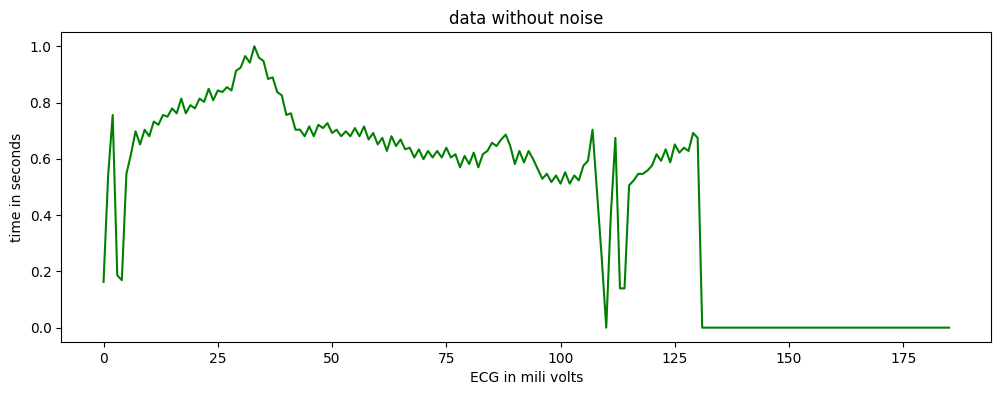

In [6]:
def add_gaussian_noise(signal):
    noise = np.random.normal(0,0.05,186)
    return(signal + noise)
noise_data = add_gaussian_noise(train_data.iloc[0,:186])
plt.figure(figsize = [12,4.02])
plt.plot(train_data.iloc[0,:186], color = 'green')
plt.title('data without noise')
plt.xlabel('ECG in mili volts')
plt.ylabel('time in seconds')

In [7]:
from sklearn.model_selection import train_test_split
X_train = train_data.drop(187, axis=1).values
y_train = train_data[187].values
X_test = test_data.drop(187, axis=1).values
y_test = test_data[187].values
unique, counts = np.unique(y_train, return_counts=True)

pd.DataFrame(np.asarray((unique, counts)).T)

,0,1
0,0.0,20000.0
1,1.0,20000.0
2,2.0,20000.0
3,3.0,20000.0
4,4.0,20000.0


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

In [25]:
model = XGBClassifier()

print(f'Training Model XGB \n--------------')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='micro'))    
print("Precision Score : ",precision_score(y_test, y_pred,  pos_label='positive',average='micro'))     

print(f"Testing F-1:", f1_score(y_test, y_pred, pos_label='positive', average='micro'))

print(f"Testing F-Beta:", fbeta_score(y_test, y_pred, beta=0.5, pos_label='positive', average='micro'))
print('-'*30)

Training Model XGB 
--------------
Training Accuracy: 0.99971
Testing Accuracy: 0.99971
Testing Confusion Matrix: 
[[19973    22     5     0     0]
 [    0 20000     0     0     0]
 [    2     0 19998     0     0]
 [    0     0     0 20000     0]
 [    0     0     0     0 20000]]
Recall Score :  0.99971
Precision Score :  0.99971
Testing F-1: 0.99971
Testing F-Beta: 0.99971
------------------------------


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classifi

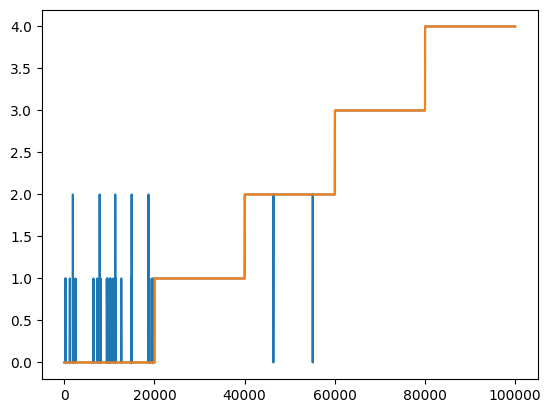

In [30]:
plt.plot(y_pred)
plt.plot(y_test)
plt.show()

In [31]:
from keras.utils.np_utils import to_categorical
to_categorical(y_pred)

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [28]:
to_categorical(y_test)

array([0., 0., 0., ..., 4., 4., 4.])

Normalized confusion matrix


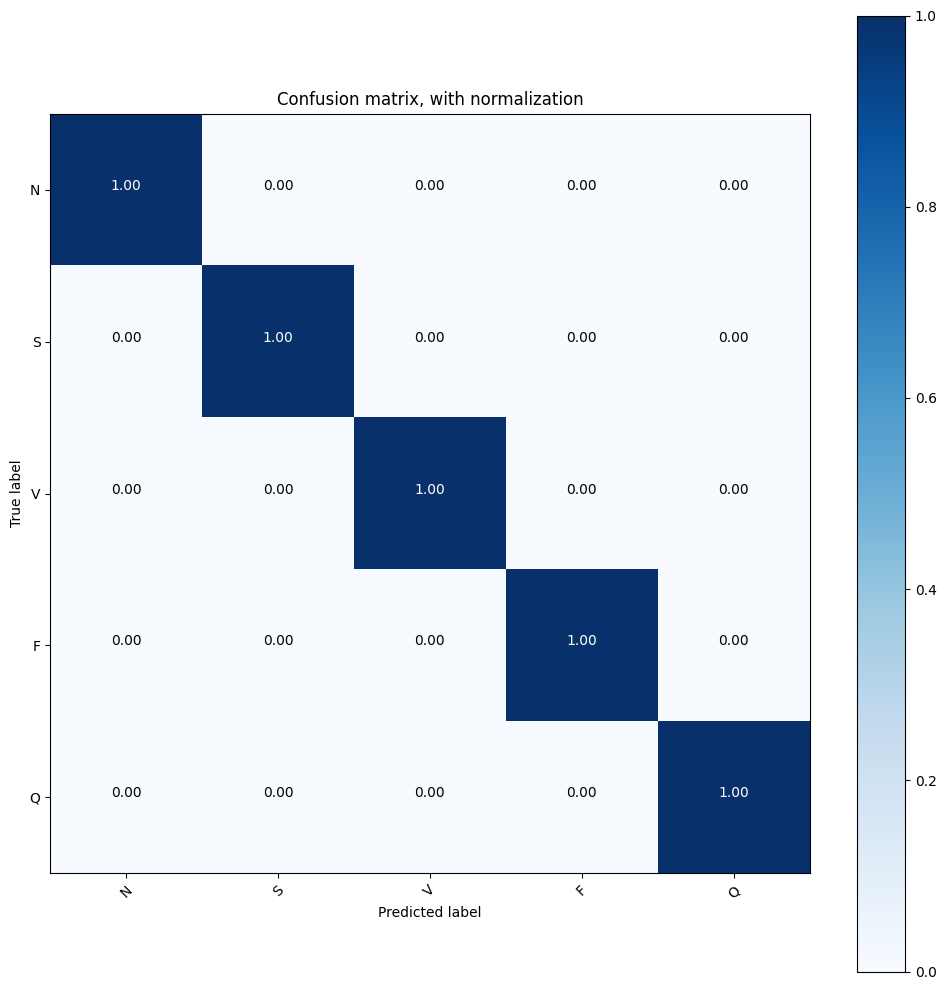

In [32]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(to_categorical(y_test).argmax(axis=1), to_categorical(y_pred).argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()